In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"cb595d8a-6eac-4e19-96ed-b1540e5c031c\"")

In [ ]:
hex_project_name = _hex_json.loads("\"From Pixels to Insights: Seamlessly Extracting and Visualizing Table Data with Unstructured and Hex\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

Have you ever wanted to take a scanned image of a table and automagically create whatever plots you'd like of the data? Try out this notebook where we combine table extraction via Unstructured with Hex's magic for processing and visualizing the data. Try this notebook on your own data by pointing it to a URL with your table of choice. And stay tuned for updates to see a no-code version of this workflow with Unstructured Platform.

Learn more about Hex: [https://hex.tech/](https://hex.tech/)

Learn more about Unstructured: [https://unstructured.io/](https://unstructured.io/)

Learn more about Hex Magic: [https://learn.hex.tech/docs/hex-magic](https://learn.hex.tech/docs/hex-magic)



Authors: Tarun Narayanan & Nina Lopatina @ Unstructured

Tarun's X handle and LI: [@narayanan_tarun](https://x.com/narayanan_tarun) [https://www.linkedin.com/in/tarunn2799](https://www.linkedin.com/in/tarunn2799)

Nina's X  handle and LI: [@NinaLopatina](https://www.google.com/url?q=https%3A%2F%2Fx.com%2Fninalopatina)  [https://www.linkedin.com/in/ninalopatina](https://www.google.com/url?q=https%3A%2F%2Fwww.linkedin.com%2Fin%2Fninalopatina)

Last updated: 11.07.2024



## Imports and Setup



In [ ]:
# Install dependencies -> you can edit the additional packages based on the libraries you need. More information: https://docs.unstructured.io/api-reference/ingest/ingest-dependencies
!pip install -q "unstructured-ingest[md, pdf]"

In [ ]:
import os
import time
import requests
import json
import pandas as pd

from unstructured_ingest.v2.pipeline.pipeline import Pipeline
from unstructured_ingest.v2.interfaces import ProcessorConfig

from unstructured_ingest.v2.processes.connectors.local import (
    LocalIndexerConfig,
    LocalDownloaderConfig,
    LocalConnectionConfig,
    LocalUploaderConfig
)

from unstructured_ingest.v2.processes.partitioner import PartitionerConfig
from unstructured_ingest.v2.processes.chunker import ChunkerConfig
from unstructured_ingest.v2.processes.embedder import EmbedderConfig

os.makedirs('ingest_docs/output', exist_ok=True) 

Function to download your file(s)



In [ ]:
def download_image(image_url, save_path):
    try:
        response = requests.get(image_url, stream=True)
        if response.status_code == 200:
            with open(save_path, 'wb') as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
            print(f"Image successfully downloaded: {save_path}")
        else:
            print(f"Failed to download image. Status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")

## Data Setup

Image successfully downloaded: ingest_docs/image.png


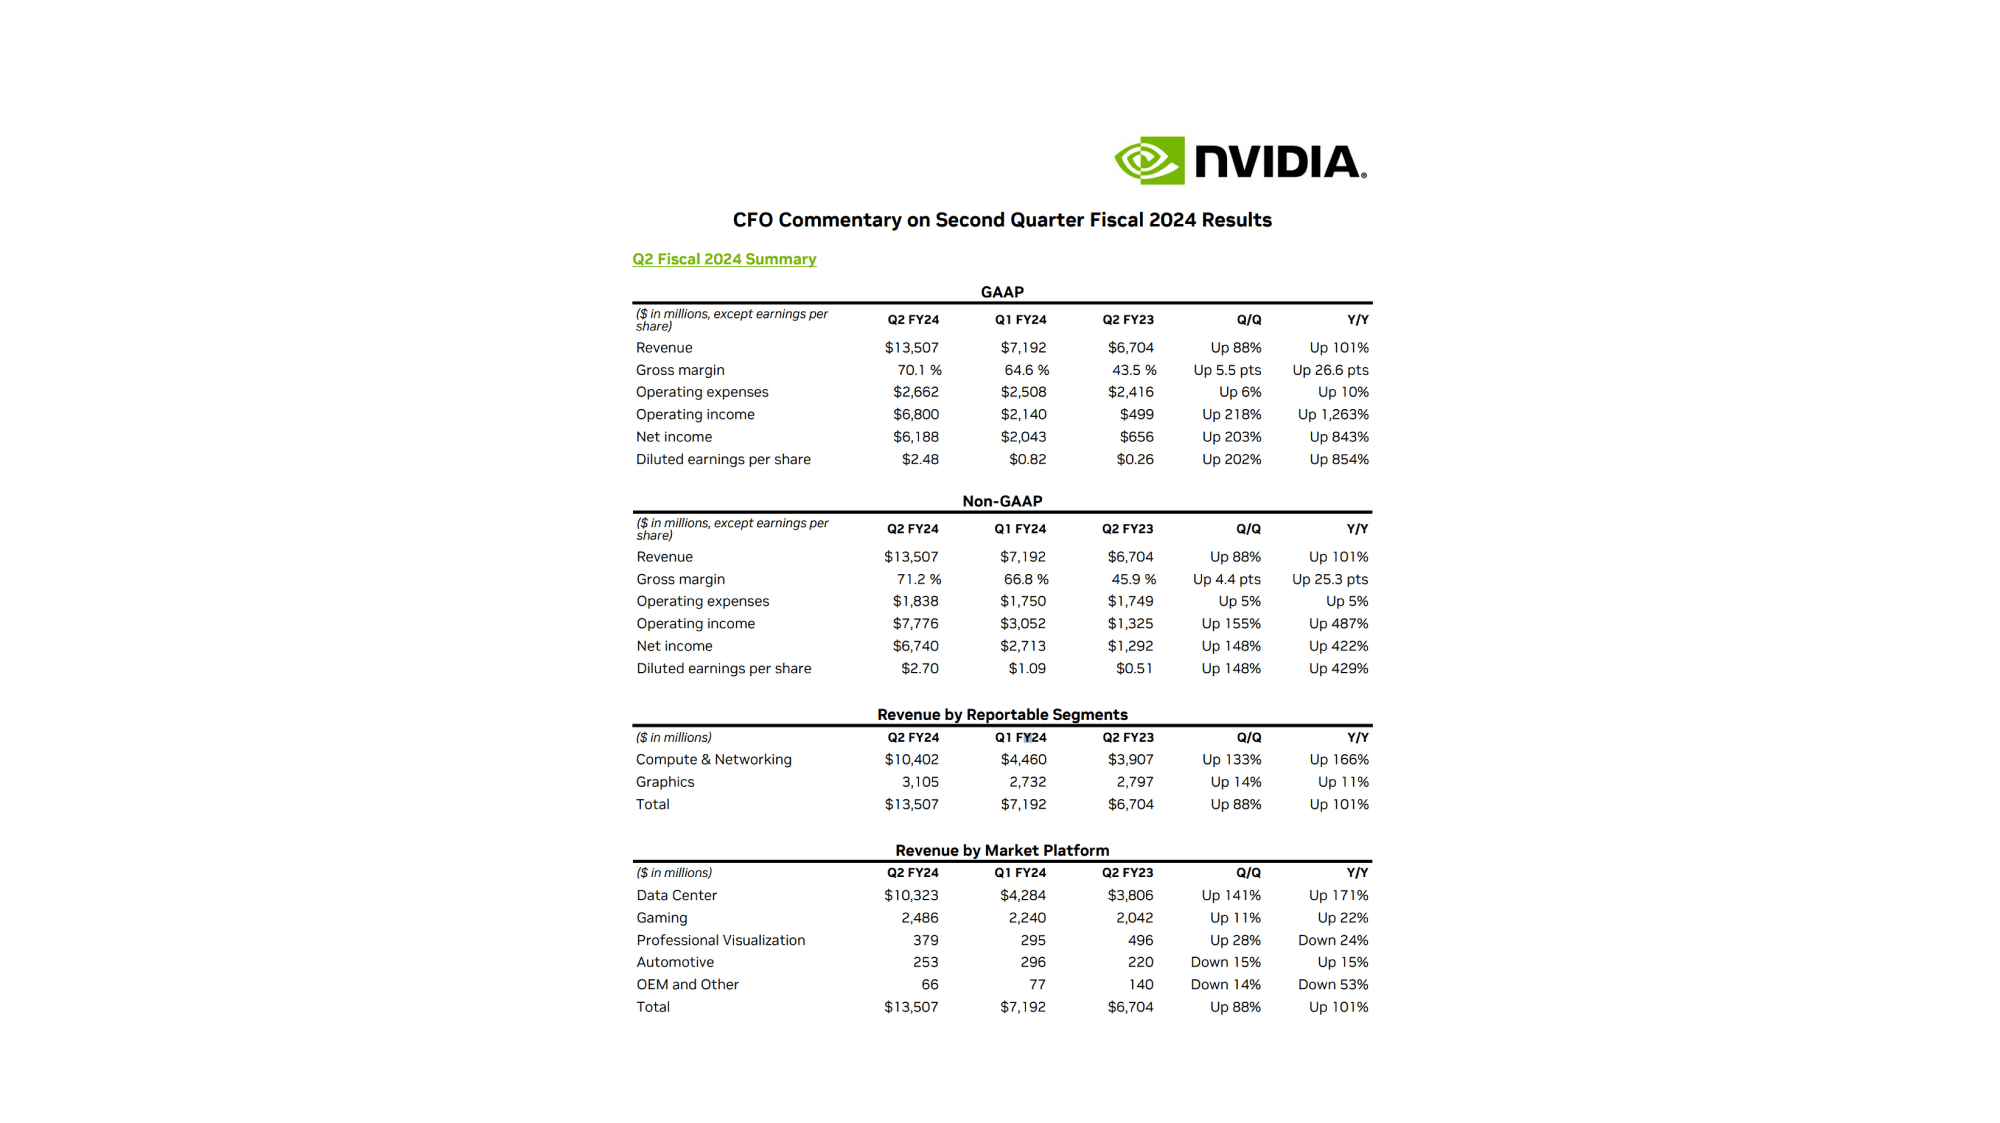

In [ ]:
from PIL import Image
from IPython.display import display

image_url = "https://framerusercontent.com/images/CfLMyYcHjr1R813WiJA2vv45JZ0.png" # Add your own URL here!
download_image(image_url, "ingest_docs/image.png")

image = Image.open("ingest_docs/image.png")

display(image)

Now we have our image loaded! Now let's turn this into a pandas dataframe, starting with processing with Unstructured's API. Sign up for your 2 week free trial at [https://unstructured.io/api-key-hosted](https://unstructured.io/api-key-hosted)



Once you have access to your API key (if you're lost, you can always go [here](https://app.unstructured.io/) to find it again), you can include that as a `secret` within your Hex project. This enhances security while also enabling ease of access to your secret keys. 



To add secrets to your Hex project click on `Variables` on the left sidebar of the Hex interface. Under this menu, the first section `Secrets` allows you to include your project secrets and access them anywhere in the project. Add your key here as `UNSTRUCTURED_API_KEY` along with its corresponding `UNSTRUCTURED_API_URL`. 



You can now directly call the `UNSTRUCTURED_API_KEY`  variable to access the API key anywhere in the notebook. 



In [ ]:
Pipeline.from_configs(
    context=ProcessorConfig(reprocess=True), #set reprocess = True for experimentation
    indexer_config=LocalIndexerConfig(input_path="ingest_docs/"), # Local path containing your documents. 
    downloader_config=LocalDownloaderConfig(), # Placeholder downloader config 
    source_connection_config=LocalConnectionConfig(), #Placeholder connection config. These placeholder configs will make a lot of sense when you use a different source connector. 
    partitioner_config=PartitionerConfig(
        partition_by_api=True, #Use Unstructured's API for table extraction.
        api_key=UNSTRUCTURED_API_KEY,
        partition_endpoint=UNSTRUCTURED_API_URL,
        strategy='hi_res',
        hi_res_model = 'layout_v1.1.0'
    ),
    uploader_config=LocalUploaderConfig(output_dir='ingest_docs/output/') # Destination path to store processed files. 
).run()

Overriding of current TracerProvider is not allowed
2024-11-08 20:27:29,988 MainProcess INFO     created index with configs: {"input_path": "ingest_docs", "recursive": false}, connection configs: {"access_config": "**********"}
2024-11-08 20:27:29,989 MainProcess INFO     Created download with configs: {"download_dir": null}, connection configs: {"access_config": "**********"}
2024-11-08 20:27:29,989 MainProcess INFO     created partition with configs: {"strategy": "hi_res", "ocr_languages": null, "encoding": null, "additional_partition_args": null, "skip_infer_table_types": null, "fields_include": ["element_id", "text", "type", "metadata", "embeddings"], "flatten_metadata": false, "metadata_exclude": [], "metadata_include": [], "partition_endpoint": "[SECRET VALUE]", "partition_by_api": true, "api_key": "*******", "hi_res_model_name": null}
2024-11-08 20:27:29,990 MainProcess INFO     Created upload with configs: {"output_dir": "ingest_docs/output/"}, connection configs: {"access_conf

## Process results

Next, we will load the json file with the extracted contents and explain what the json contains



In [ ]:
with open('ingest_docs/output/image.png.json', 'r') as f:
    data = json.load(f)

data[0].keys()

dict_keys(['type', 'element_id', 'text', 'metadata'])

- `type` : Predicted data type of the element. In our case we are interested in ones with type == `table`
- `element_id` : Element identifier across all predicted elements. 
- `text` : structured text output for this element. 
- `metadata` : contains type level metadata. For `table` the pipeline generates the table structure in HTML format, along with other type specific metadata.

Now for every element that we have detected as a "Table", we can access the text_as_html contents in the metadata. 



In [ ]:
table_dfs = []

for element in data:
    if element["type"] == "Table":
        html_content = element["metadata"]["text_as_html"]
        tables = pd.read_html(html_content) # Read HTML table directly as a pandas dataframe. 
        
        if tables:
            table_dfs.append(tables[0])

# final_df = pd.concat(table_dfs, ignore_index=True)

We have 4 tables in our image. Let's analyze each table individually. 



In [ ]:
t1, t2, t3, t4 = table_dfs

Looking at the GAAP metrics from Table 1

To work best with Hex, we need to remove nested column names, so we are simplifying the column names below



In [ ]:
t1.columns = ['Category', 'Q2FY24', 'Q1FY24', 'Q2FY23', 'Q/Q', 'YiY']

In [ ]:
t1

One catch! Unstructured parses content into strings, but we need clean numerical values. So this is the magic command we wrote to generate the code below (to add a magic cell, click on + to add cell and then select Magic):

Magic: "on @t1, drop Q/Q and YiY columns. the Q columns in @t1 are currently percentages and dollar amounts. for each column, remove all "$"s, "%"s, and ","s. Then coerce the columns to numbers."



In [ ]:
t1 = t1.drop(columns=["Q/Q", "YiY"])
for col in ["Q1FY24", "Q2FY23", "Q2FY24"]:
    t1[col] = t1[col].replace({"\$": "", ",": "", "%": ""}, regex=True).astype(float)

In [ ]:
t1

In [ ]:
t1.dtypes

Category     object
Q2FY24      float64
Q1FY24      float64
Q2FY23      float64
dtype: object

Success! We are ignoring the columns with additional text for now, and just focusing on the Quarterly updates. Here is our magic command to generate the below plot (and then we changed it from the default to a line plot): 

magic: "using @t1, melt the dataframe to get the revenue values for each quarter. Then plot the revenue for each quarter (column) in the reverse order that they appear"




In [ ]:
import pandas as pd

# Melting the dataframe t1 to get the revenue values for each quarter
melted_df = pd.melt(
    t1,
    id_vars=["Category"],
    value_vars=["Q2FY24", "Q1FY24", "Q2FY23"],
    var_name="Quarter",
    value_name="Revenue",
)

# Display the melted dataframe
melted_df

,Category,Quarter,Revenue
0,Revenue,Q2FY24,13507.00
1,Gross margin,Q2FY24,70.10
2,Operating expenses,Q2FY24,2662.00
3,Operating income,Q2FY24,6800.00
4,Net income,Q2FY24,6188.00
5,Diluted earnings per share,Q2FY24,2.48
6,Revenue,Q1FY24,7192.00
7,Gross margin,Q1FY24,64.60
8,Operating expenses,Q1FY24,2508.00
9,Operating income,Q1FY24,2140.00


In [ ]:
import altair
chart_melted_df = altair.Chart.from_json(r"""
{
    "width": "container",
    "height": "container",
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "description": "outer data layer",
            "resolve": {
                "scale": {
                    "color": "independent",
                    "y": "shared"
                }
            },
            "layer": [
                {
                    "description": "series data layer",
                    "name": "series_6dd351fd-45ed-4dc0-92e8-2fc28b322d22",
                    "layer": [
                        {
                            "description": "line series layer",
                            "transform": [],
                            "layer": [
                                {
                                    "description": "line mark layer",
                                    "mark": {
                                        "type": "line",
                                        "point": false,
                                        "clip": true,
                                        "strokeCap": "square",
                                        "strokeJoin": "round",
                                        "cursor": "crosshair"
                                    },
                                    "encoding": {
                                        "opacity": {
                                            "value": 1
                                        }
                                    }
                                },
                                {
                                    "description": "pivot tooltip point mark layer",
                                    "mark": {
                                        "type": "point",
                                        "tooltip": true,
                                        "clip": true
                                    },
                                    "encoding": {
                                        "opacity": {
                                            "value": 0,
                                            "condition": {
                                                "param": "pivot_hover_6dd351fd-45ed-4dc0-92e8-2fc28b322d22",
                                                "value": 1,
                                                "empty": false
                                            }
                                        },
                                        "size": {
                                            "value": 80
                                        },
                                        "tooltip": [
                                            {
                                                "field": "Quarter",
                                                "type": "ordinal",
                                                "title": "Quarter"
                                            },
                                            {
                                                "field": "Revenue",
                                                "type": "quantitative",
                                                "aggregate": "sum",
                                                "formatType": "NUMBER_FORMATTER",
                                                "format": {
                                                    "format": "NUMBER",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": -1,
                                                    "currency": "USD",
                                                    "nanFormat": ""
                                                },
                                                "title": "Revenue"
                                            },
                                            {
                                                "field": "Category",
                                                "type": "ordinal",
                                                "title": "Category"
                                            }
                                        ]
                                    },
                                    "params": [
                                        {
                                            "name": "pivot_hover_6dd351fd-45ed-4dc0-92e8-2fc28b322d22",
                                            "select": {
                                                "type": "point",
                                                "on": "mouseover",
                                                "clear": "mouseout",
                                                "nearest": true,
                                                "fields": [
                                                    "Quarter",
                                                    "Category"
                                                ]
                                            }
                                        }
                                    ]
                                }
                            ],
                            "encoding": {
                                "x": {
                                    "field": "Quarter",
                                    "type": "ordinal",
                                    "title": "Quarter",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "labels": true,
                                        "labelFlush": false,
                                        "labelOverlap": "greedy"
                                    }
                                },
                                "y": {
                                    "field": "Revenue",
                                    "type": "quantitative",
                                    "aggregate": "sum",
                                    "title": "Revenue",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "labels": true,
                                        "labelFlush": false,
                                        "format": {
                                            "format": "NUMBER",
                                            "columnType": "NUMBER",
                                            "numDecimalDigits": -1,
                                            "currency": "USD",
                                            "nanFormat": ""
                                        },
                                        "formatType": "NUMBER_FORMATTER"
                                    }
                                },
                                "color": {
                                    "field": "Category",
                                    "scale": {
                                        "range": [
                                            "#4C78A8",
                                            "#F58518",
                                            "#E45756",
                                            "#72B7B2",
                                            "#54A24B",
                                            "#EECA3B",
                                            "#B279A2",
                                            "#FF9DA6",
                                            "#9D755D",
                                            "#BAB0AC"
                                        ]
                                    },
                                    "legend": {
                                        "symbolOpacity": 1,
                                        "symbolType": "stroke"
                                    },
                                    "title": "Category"
                                }
                            }
                        }
                    ]
                }
            ],
            "transform": []
        }
    ],
    "config": {
        "legend": {
            "orient": "right"
        },
        "font": "\"IBM Plex Sans\", system-ui, -apple-system, BlinkMacSystemFont, sans-serif",
        "view": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    },
    "usermeta": {
        "selectionConfigs": {},
        "columnNameMappings": {}
    }
}
""")
chart_melted_df.datasets.layer00 = melted_df.to_json(orient='records')
chart_melted_df.display(actions=False)

Voila! We have turned our image of a table into an interactive plot. After running the magic, I changed the Chart Type to Line Chart and added a title. The x-axis didn't appear in the order I wanted, because it sorted alphabetically, but all the info is there!



Let's try Magic again with another table from the same image! Let's try to visualize and compare revenue across different market platforms.



In [ ]:
t4.columns = ['Category', 'Q2FY24', 'Q1FY24', 'Q2FY23', 'Q/Q', 'YiY']
t4_cleaned = t4.drop(columns=["Q/Q", "YiY"])

for col in ["Q1FY24", "Q2FY23", "Q2FY24"]:
    t4_cleaned[col] = t4_cleaned[col].replace({"\$": "", ",": "", "%": ""}, regex=True).astype(float)

magic command: `"use @t4_cleaned to melt the dataframe to get the revenue values across all market platforms for each quarter. Then plot the revenue for each quarter (column) as a grouped column chart in the reverse order that they appear"`

In [ ]:
import pandas as pd

t4_melted = t4_cleaned.melt(
    id_vars=["Category"],
    value_vars=["Q1FY24", "Q2FY23", "Q2FY24"],
    var_name="Quarter",
    value_name="Revenue",
)
t4_melted

,Category,Quarter,Revenue
0,Data Center,Q1FY24,4284.0
1,Gaming,Q1FY24,2240.0
2,Professional Visualization,Q1FY24,295.0
3,Automotive,Q1FY24,296.0
4,OEM and Other,Q1FY24,77.0
5,Total,Q1FY24,7192.0
6,Data Center,Q2FY23,3806.0
7,Gaming,Q2FY23,2042.0
8,Professional Visualization,Q2FY23,496.0
9,Automotive,Q2FY23,220.0


In [ ]:
import altair
chart_t4_melted = altair.Chart.from_json(r"""
{
    "width": "container",
    "height": "container",
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "layer": [
        {
            "description": "outer data layer",
            "resolve": {
                "scale": {
                    "color": "independent",
                    "y": "shared"
                }
            },
            "layer": [
                {
                    "description": "series data layer",
                    "name": "series_85f5cb62-abf3-4cba-8bc3-2386df802ea5",
                    "layer": [
                        {
                            "description": "bar series layer",
                            "transform": [],
                            "layer": [
                                {
                                    "description": "bar mark layer",
                                    "mark": {
                                        "type": "bar",
                                        "clip": true,
                                        "filled": true,
                                        "cursor": "pointer",
                                        "orient": "vertical"
                                    },
                                    "encoding": {
                                        "opacity": {
                                            "value": 1
                                        },
                                        "tooltip": [
                                            {
                                                "field": "Quarter",
                                                "type": "ordinal",
                                                "title": "Quarter"
                                            },
                                            {
                                                "field": "Revenue",
                                                "type": "quantitative",
                                                "aggregate": "sum",
                                                "formatType": "NUMBER_FORMATTER",
                                                "format": {
                                                    "format": "PLAIN",
                                                    "currency": "",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": 2,
                                                    "nanFormat": ""
                                                },
                                                "title": "Revenue"
                                            },
                                            {
                                                "field": "Category",
                                                "type": "ordinal",
                                                "title": "Category"
                                            }
                                        ],
                                        "color": {
                                            "field": "Category",
                                            "scale": {
                                                "range": [
                                                    "#4C78A8",
                                                    "#F58518",
                                                    "#E45756",
                                                    "#72B7B2",
                                                    "#54A24B",
                                                    "#EECA3B",
                                                    "#B279A2",
                                                    "#FF9DA6",
                                                    "#9D755D",
                                                    "#BAB0AC"
                                                ]
                                            },
                                            "legend": {
                                                "symbolOpacity": 1
                                            },
                                            "title": "Category"
                                        },
                                        "x": {
                                            "field": "Quarter",
                                            "type": "ordinal",
                                            "title": "Quarter",
                                            "scale": {},
                                            "axis": {
                                                "grid": true,
                                                "ticks": true,
                                                "labels": true,
                                                "labelFlush": false,
                                                "labelOverlap": "greedy"
                                            }
                                        },
                                        "y": {
                                            "field": "Revenue",
                                            "type": "quantitative",
                                            "aggregate": "sum",
                                            "title": "Revenue",
                                            "scale": {},
                                            "axis": {
                                                "grid": true,
                                                "ticks": true,
                                                "labels": true,
                                                "labelFlush": false,
                                                "format": {
                                                    "format": "PLAIN",
                                                    "currency": "",
                                                    "columnType": "NUMBER",
                                                    "numDecimalDigits": 2,
                                                    "nanFormat": ""
                                                },
                                                "formatType": "NUMBER_FORMATTER"
                                            }
                                        }
                                    }
                                }
                            ],
                            "encoding": {
                                "x": {
                                    "field": "Quarter",
                                    "type": "ordinal",
                                    "title": "Quarter",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "labels": true,
                                        "labelFlush": false,
                                        "labelOverlap": "greedy"
                                    }
                                },
                                "y": {
                                    "field": "Revenue",
                                    "type": "quantitative",
                                    "aggregate": "sum",
                                    "title": "Revenue",
                                    "scale": {},
                                    "axis": {
                                        "grid": true,
                                        "ticks": true,
                                        "labels": true,
                                        "labelFlush": false,
                                        "format": {
                                            "format": "PLAIN",
                                            "currency": "",
                                            "columnType": "NUMBER",
                                            "numDecimalDigits": 2,
                                            "nanFormat": ""
                                        },
                                        "formatType": "NUMBER_FORMATTER"
                                    }
                                },
                                "xOffset": {
                                    "field": "Category"
                                }
                            }
                        }
                    ]
                }
            ],
            "transform": []
        }
    ],
    "config": {
        "legend": {
            "orient": "right"
        },
        "font": "\"IBM Plex Sans\", system-ui, -apple-system, BlinkMacSystemFont, sans-serif",
        "view": {}
    },
    "datasets": {
        "layer00": [
            {
                "name": "dummy",
                "value": 0
            }
        ]
    },
    "usermeta": {
        "selectionConfigs": {},
        "columnNameMappings": {}
    }
}
""")
chart_t4_melted.datasets.layer00 = t4_melted.to_json(orient='records')
chart_t4_melted.display(actions=False)

You can also create manual figures as below:



Comparing GAAP Gross Margins across quarters from the first table

In [ ]:
import plotly.graph_objects as go

# Sample data inferred from the image
quarters = ["Q2FY24", "Q1FY24", "Q2FY23"]
gross_margins = [70.1, 64.6, 435]  # Values in percentage format for each quarter

# Creating the figure
fig = go.Figure()

# Adding the gross margin data
fig.add_trace(go.Bar(
    x=quarters,
    y=gross_margins,
    text=gross_margins,
    textposition='auto',
    name="Gross Margin",
    marker=dict(color='lightblue')
))

# Updating layout
fig.update_layout(
    title="Gross Margin Comparison Across Quarters",
    xaxis_title="Quarters",
    yaxis_title="Gross Margin (%)",
    yaxis=dict(range=[0, max(gross_margins) * 1.1]),  # Adjust the y-axis range
)

# Show the figure
fig.show()


Let's look at the second table : Non-GAAP

In [ ]:
t2.columns = ['Category', 'Q2FY24', 'Q1FY24', 'Q2FY23', 'Q/Q', 'YiY']

In [ ]:
t2

Comparing Non-GAAP Opex from Table 2

In [ ]:
import plotly.graph_objects as go

# Sample data inferred from the image
quarters = ["Q2FY24", "Q1FY24", "Q2FY23"]
opex = [1838, 1750, 1749]  # Values in percentage format for each quarter

# Creating the figure
fig = go.Figure()

# Adding the gross margin data
fig.add_trace(go.Bar(
    x=quarters,
    y=opex,
    text=opex,
    textposition='auto',
    name="Gross Margin",
    marker=dict(color='lightblue')
))

# Updating layout
fig.update_layout(
    title="Non-GAAP OpEx Comparison Across Quarters",
    xaxis_title="Quarters",
    yaxis_title="Operating Expense ($ in millions)",
    yaxis=dict(range=[0, max(opex) * 1.1]),  # Adjust the y-axis range
)

# Show the figure
fig.show()


On to Table 3 : Revenue by Reportable Segments

In [ ]:
t3.columns = ['Category', 'Q2FY24', 'Q1FY24', 'Q2FY23', 'Q/Q', 'YiY']

In [ ]:
t3

Comparing revenue generated from Graphics across the quarters

In [ ]:
import plotly.graph_objects as go

# Sample data inferred from the image
quarters = ["Q2FY24", "Q1FY24", "Q2FY23"]
graphics_rev = t3[t3['Category'] == 'Graphics'][quarters].values.astype('float').tolist()[0]

# Creating the figure
fig = go.Figure()

# Adding the gross margin data
fig.add_trace(go.Bar(
    x=quarters,
    y=graphics_rev,
    text=graphics_rev,
    textposition='auto',
    name="Revenue",
    marker=dict(color='lightblue')
))

# Updating layout
fig.update_layout(
    title="Revenue in Graphics: Comparison Across Quarters",
    xaxis_title="Quarters",
    yaxis_title="Revenue ($ in millions)",
    yaxis=dict(range=[0, max(graphics_rev) * 1.1]),  # Adjust the y-axis range
)

# Show the figure
fig.show()


Looking at table 4 : Revenue by Market Platform

In [ ]:
t4.columns = ['Category', 'Q2FY24', 'Q1FY24', 'Q2FY23', 'Q/Q', 'YiY']

In [ ]:
t4

Comparing YoY changes across different platforms from Table 4

In [ ]:
categories = t4["Category"][:-1]  # Excluding the 'Total' row
yoy_changes = t4["YiY"][:-1].str.replace("Up ", "").str.replace("Down ", "-").str.replace("%", "").astype(int)

# Creating the plot
fig = go.Figure()

# Adding the YoY change data
fig.add_trace(go.Bar(
    x=categories,
    y=yoy_changes,
    text=[f"{val}%" for val in yoy_changes],
    textposition='auto',
    name="YoY Change",
    marker=dict(color='orange')
))

# Updating layout
fig.update_layout(
    title="Year-over-Year (YoY) Change Comparison Across Categories",
    xaxis_title="Categories",
    yaxis_title="YoY Change (%)",
    yaxis=dict(range=[min(yoy_changes) * 1.1, max(yoy_changes) * 1.1]),  # Adjusting the y-axis range
)

# Show the figure
fig.show()